In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1)

# Loading the Datasets

In [158]:
taxi=pd.read_csv('cab_rides.csv')
weather=pd.read_csv('weather.csv')

## start with Data cleaning

In [159]:
taxi.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [160]:
taxi.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.892342e+08,9.324359,0.091641
min,0.020000,1.543200e+12,2.500000,1.000000
25%,1.280000,1.543440e+12,9.000000,1.000000
50%,2.160000,1.543740e+12,13.500000,1.000000
75%,2.920000,1.544830e+12,22.500000,1.000000
max,7.860000,1.545160e+12,97.500000,3.000000


In [161]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  float64
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(4), object(6)
memory usage: 52.9+ MB


In [162]:
taxi.shape

(693071, 10)

# investigate and find missing data

In [163]:
taxi.isnull().sum()

,0
distance,0
cab_type,0
time_stamp,0
destination,0
source,0
price,55095
surge_multiplier,0
id,0
product_id,0
name,0


In [164]:
print(' percentage of missing price values  = {}'.format((taxi['price'].isnull().sum()/len(taxi))*100))


 percentage of missing price values  = 7.949402009317949


## since `price` is our target so we will drop the rows containing missing values

In [165]:
taxi.dropna(inplace=True)
taxi.isnull().sum()

,0
distance,0
cab_type,0
time_stamp,0
destination,0
source,0
price,0
surge_multiplier,0
id,0
product_id,0
name,0


# investigate and find Duplicated data

In [166]:
taxi.duplicated().sum()

0

# Detecting outliers

In [167]:
taxi.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

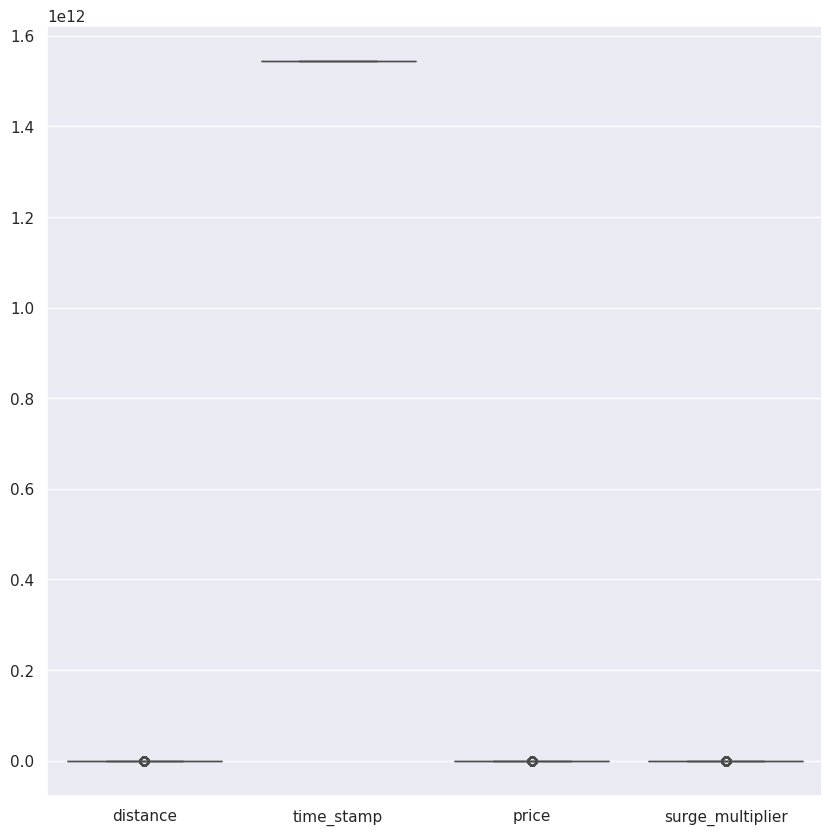

In [168]:
sns.boxplot(data=taxi)
plt.show()

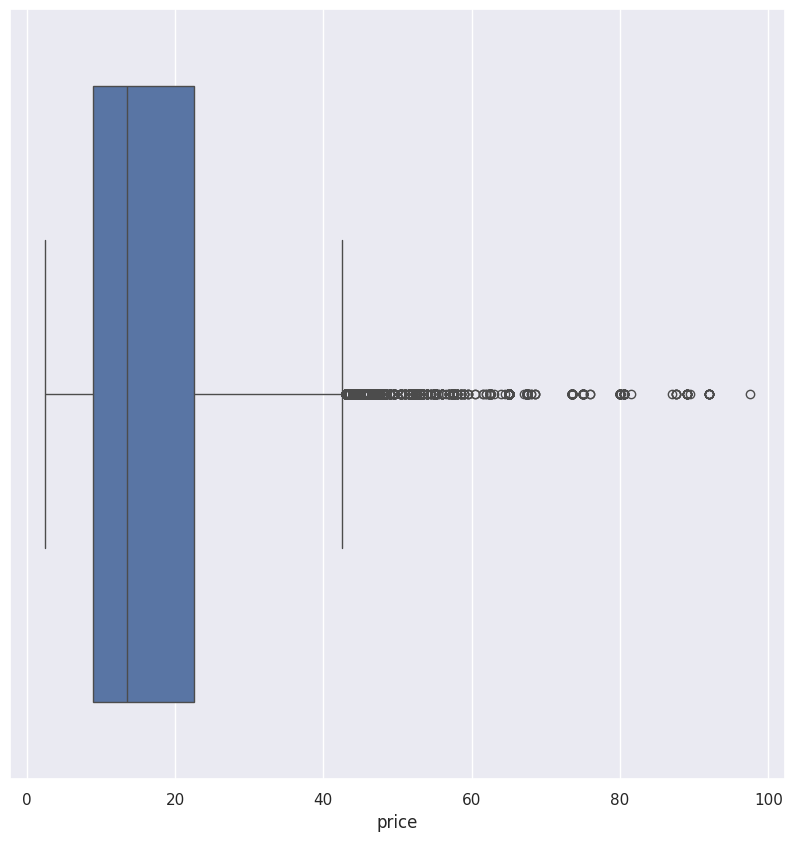

In [169]:
sns.boxplot(x=taxi['price'])
plt.show()

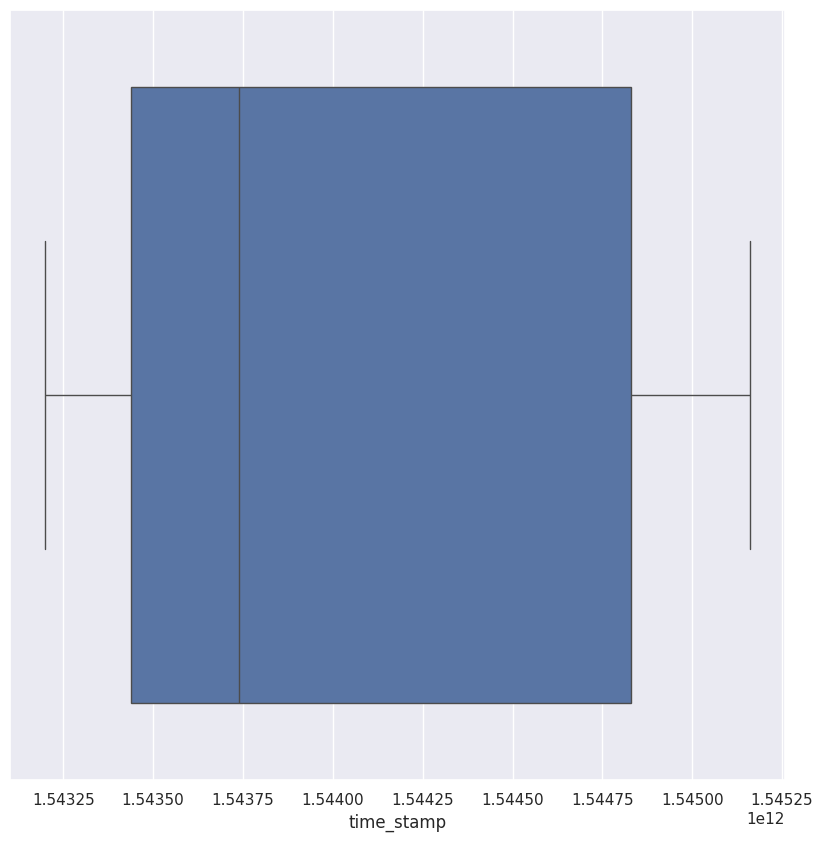

In [170]:
sns.boxplot(x=taxi['time_stamp'])
plt.show()

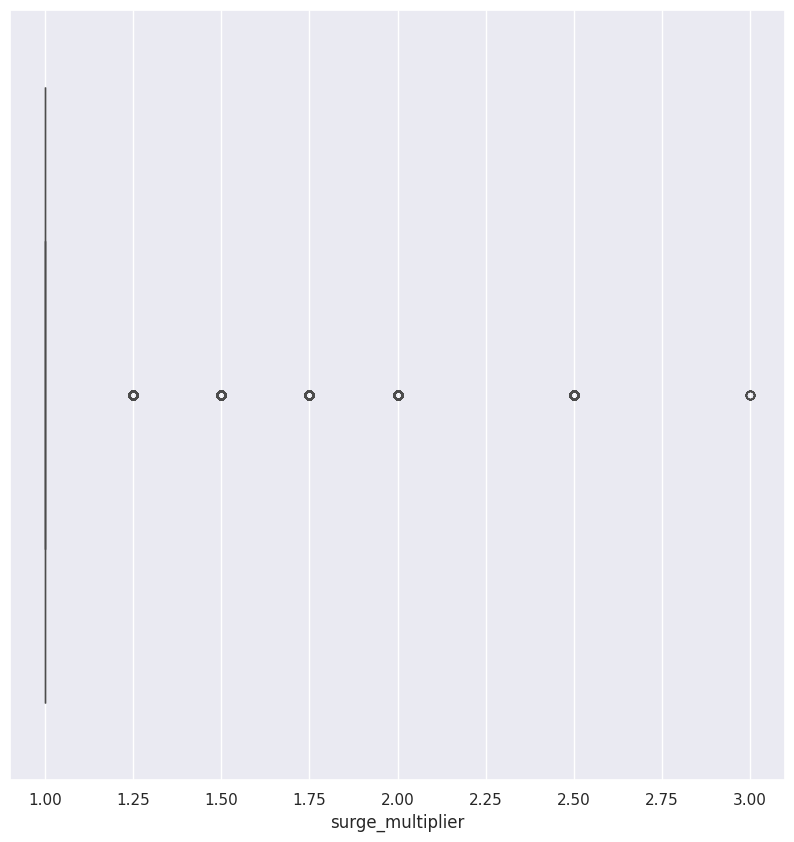

In [171]:
sns.boxplot(x=taxi['surge_multiplier'])
plt.show()

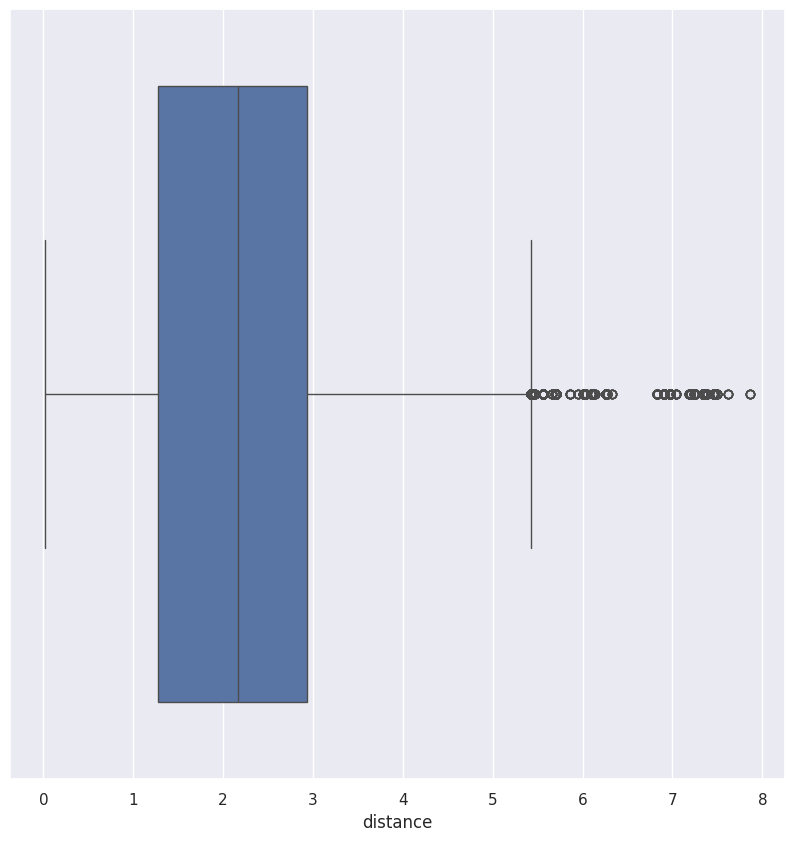

In [172]:
sns.boxplot(x=taxi['distance'])
plt.show()

# remove_outliers using `IQR` method

In [173]:
def remove_outliers(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        upper_limit=Q3+1.5*IQR
        lower_limit=Q1-1.5*IQR
        # outlires are below lower limit and above upper limit
        outliers = ( ( df[col] < lower_limit) | (df[col] > upper_limit) )
        indecies=df[outliers].index
        print('number of outliers in {} is : {}'.format(col,len(indecies)))
        df.drop(indecies,inplace=True)

In [174]:
columns={'distance','surge_multiplier','price'}
remove_outliers(taxi,columns)


number of outliers in distance is : 6672
number of outliers in surge_multiplier is : 20965
number of outliers in price is : 1835


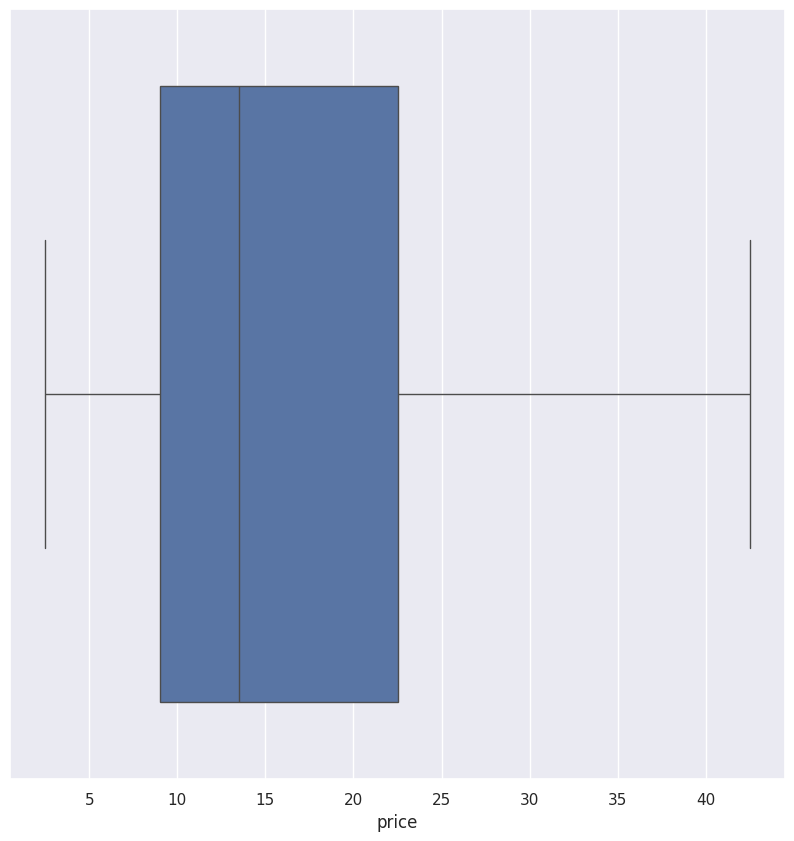

In [175]:
sns.boxplot(x=taxi['price'])
plt.show()

In [176]:
taxi.shape

(608504, 10)

In [177]:
taxi.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [178]:
taxi['id'].value_counts()

,count
id,
424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
9709ee1c-56d0-469e-a77a-99373e592f54,1
a52e3e8f-f8fb-45b0-96bd-670e1c40bf52,1
b0d238a3-b933-4f9a-aa39-82a88dbbc4da,1
c0682d91-1176-4dae-8b81-99168b413e64,1
...,...
d9ccfb48-612c-4707-b722-7e71f2869058,1
e0dac867-e907-4a4c-934f-b9550dde367f,1
019a6f02-b52d-4515-ba9a-8ea8ff2b7686,1


# we will drop this `id` feature due it doesn't provide any important information


In [179]:
taxi.drop(['id'],axis=1,inplace=True)
taxi.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL


In [180]:
taxi['destination'].value_counts()

,count
destination,
Back Bay,51441
Haymarket Square,51411
Theatre District,51385
West End,51340
Financial District,51206
Beacon Hill,51195
North End,51118
Fenway,50986
North Station,50887


In [181]:
taxi['source'].value_counts()

,count
source,
North End,52772
Haymarket Square,52727
West End,51978
North Station,51706
South Station,51446
Beacon Hill,50782
Theatre District,50523
Boston University,50225
Fenway,50163


In [182]:
taxi['name'].value_counts()

,count
name,
WAV,54053
UberX,54051
UberPool,54049
Black,54041
UberXL,54009
Black SUV,53496
Shared,51163
Lux,46972
Lyft,46972


In [183]:
taxi['product_id'].value_counts()

,count
product_id,
9a0e7b09-b92b-4c41-9779-2ad22b4d779d,54053
55c66225-fbe7-4fd5-9072-eab1ece5e23e,54051
997acbb5-e102-41e1-b155-9df7de0a73f2,54049
6c84fd89-3f11-4782-9b50-97c468b19529,54041
6f72dfc5-27f1-42e8-84db-ccc7a75f6969,54009
6d318bcc-22a3-4af6-bddd-b409bfce1546,53496
lyft_line,51163
lyft_premier,46972
lyft,46972


taxi=pd.get_dummies(data=taxi,columns=['destination','source','name','product_id'])

In [184]:
taxi.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL


## we will continue working on the left nominal features only after mergeing the 2 data sets

***

# now let's move to work on weather data

In [185]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [186]:
weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [187]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [188]:
weather.shape

(6276, 8)

In [189]:
weather.isnull().sum()

,0
temp,0
location,0
clouds,0
pressure,0
rain,5382
time_stamp,0
humidity,0
wind,0


In [190]:
print(' percentage of missing rain values  = {}'.format((weather['rain'].isnull().sum()/len(weather))*100))


 percentage of missing rain values  = 85.75525812619503


## percentage of missing rain values is about 85% so we will drop rain column

In [191]:
weather.drop(['rain'],axis=1,inplace=True)

In [192]:
weather.isnull().sum()

,0
temp,0
location,0
clouds,0
pressure,0
time_stamp,0
humidity,0
wind,0


# find duplicate data

In [193]:
weather.duplicated().sum()

0

# Detecting outliers

In [194]:
weather.columns

Index(['temp', 'location', 'clouds', 'pressure', 'time_stamp', 'humidity',
       'wind'],
      dtype='object')

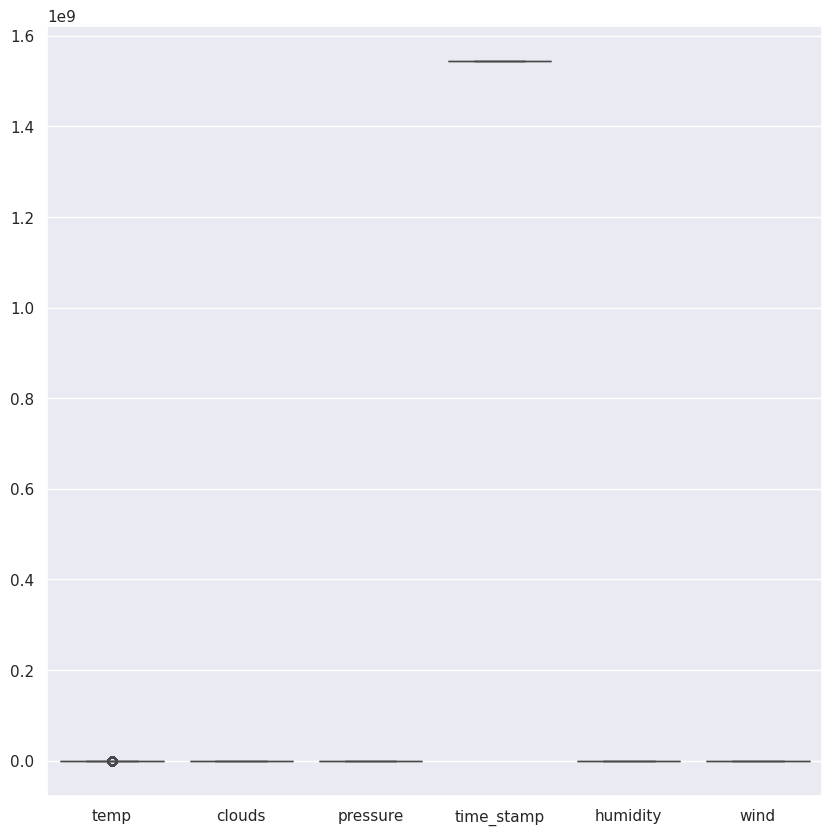

In [195]:
sns.boxplot(data=weather)
plt.show()

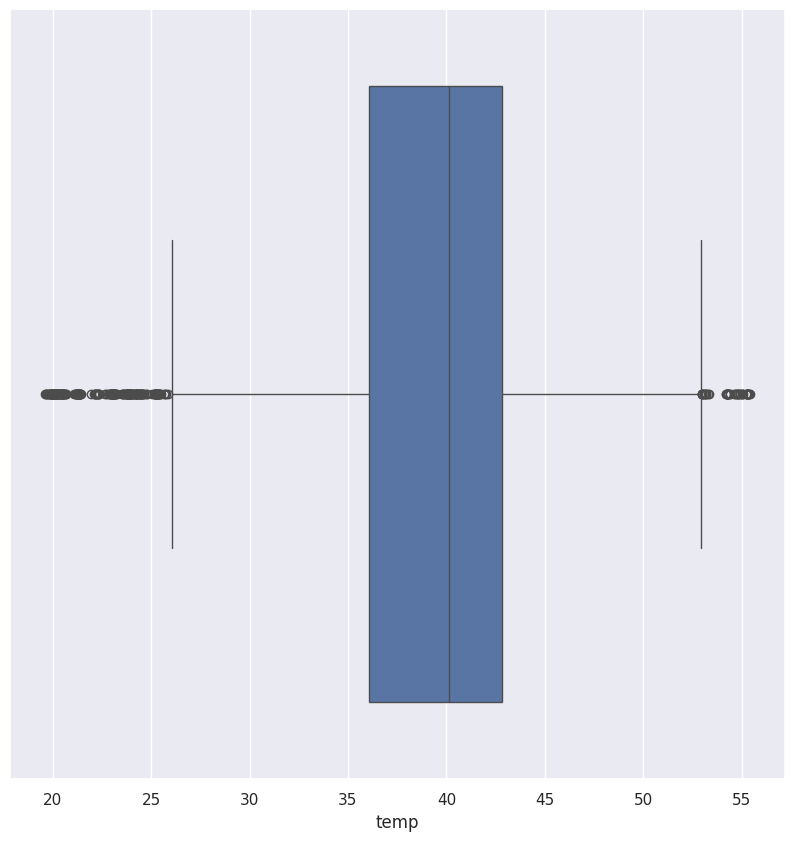

In [196]:
sns.boxplot(x=weather['temp'])
plt.show()

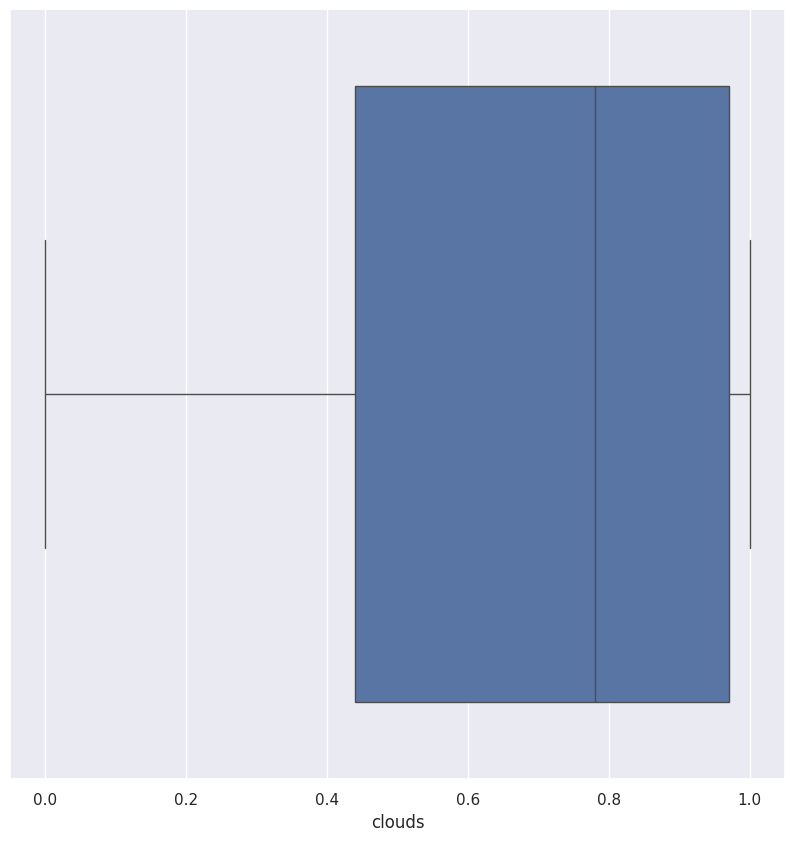

In [197]:
sns.boxplot(x=weather['clouds'])
plt.show()

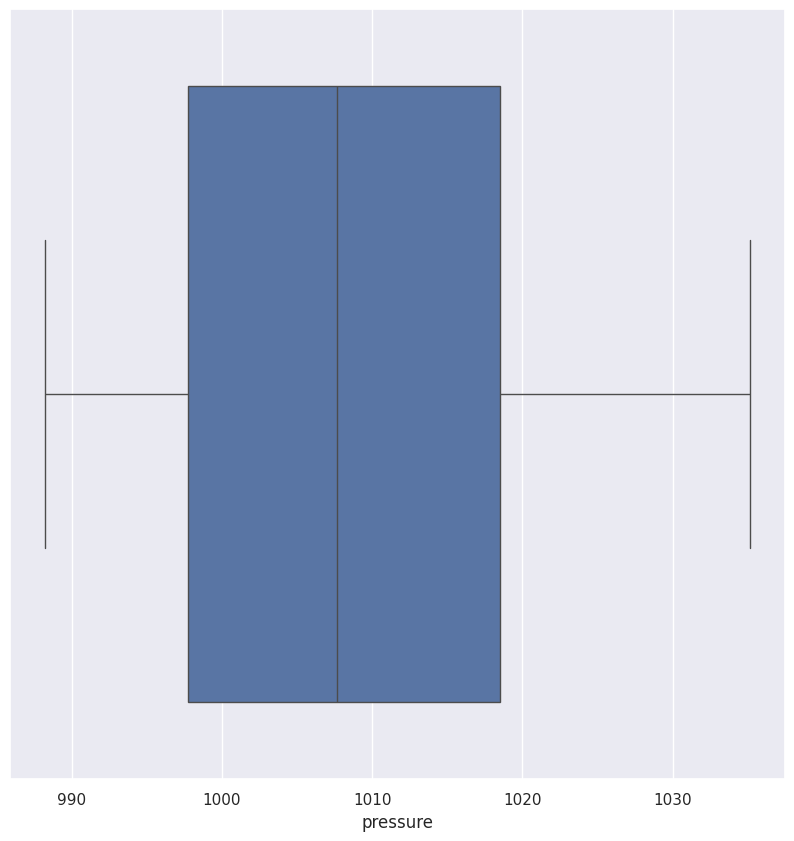

In [198]:
sns.boxplot(x=weather['pressure'])
plt.show()

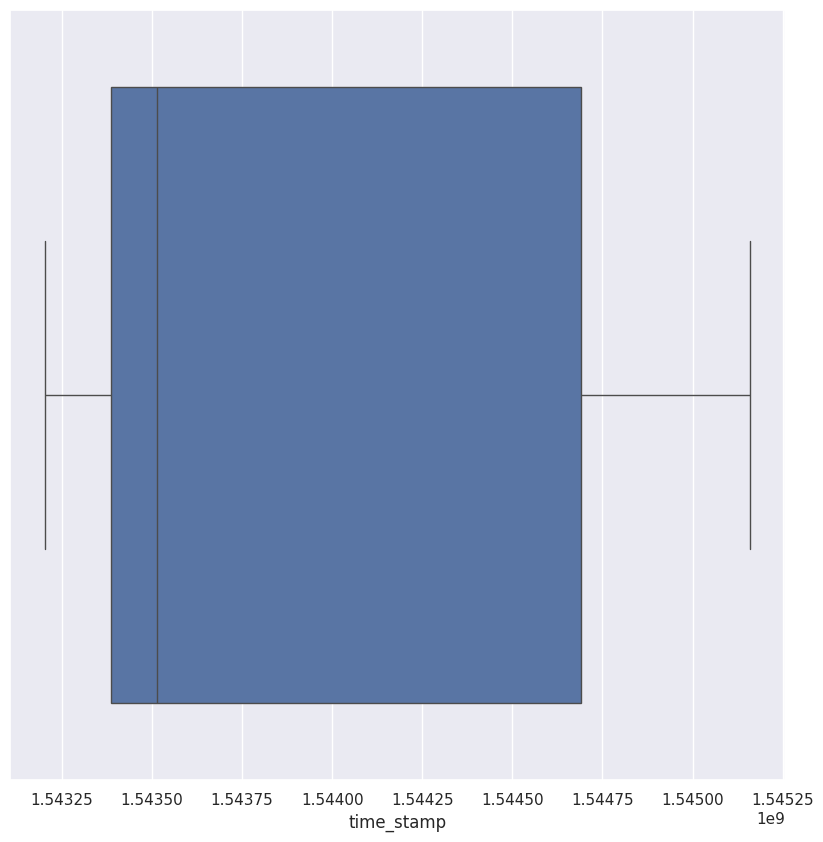

In [199]:
sns.boxplot(x=weather['time_stamp'])
plt.show()

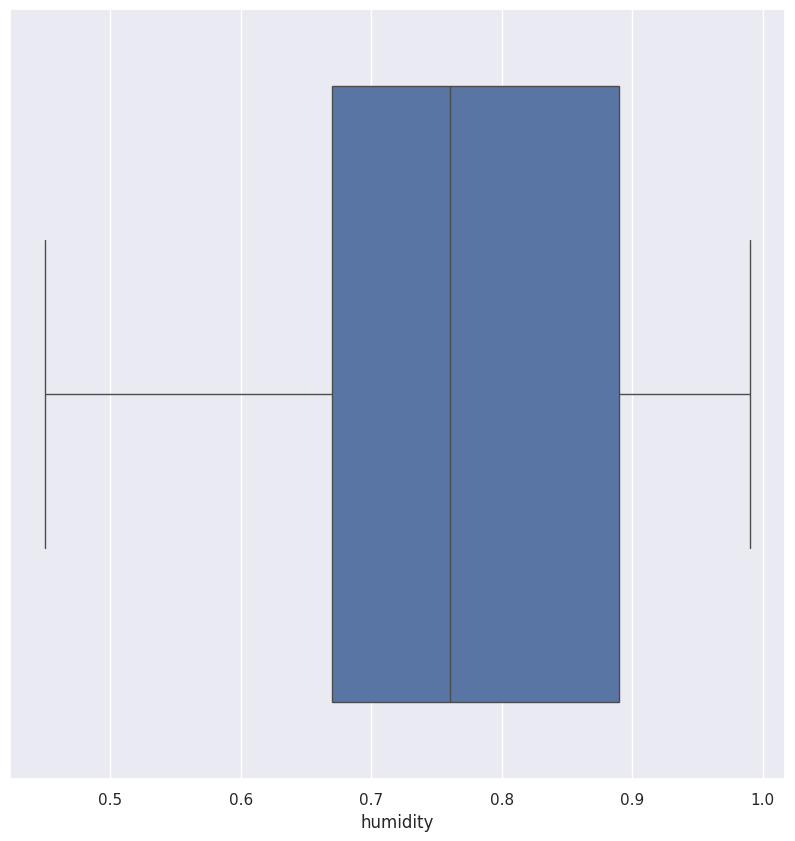

In [200]:
sns.boxplot(x=weather['humidity'])
plt.show()

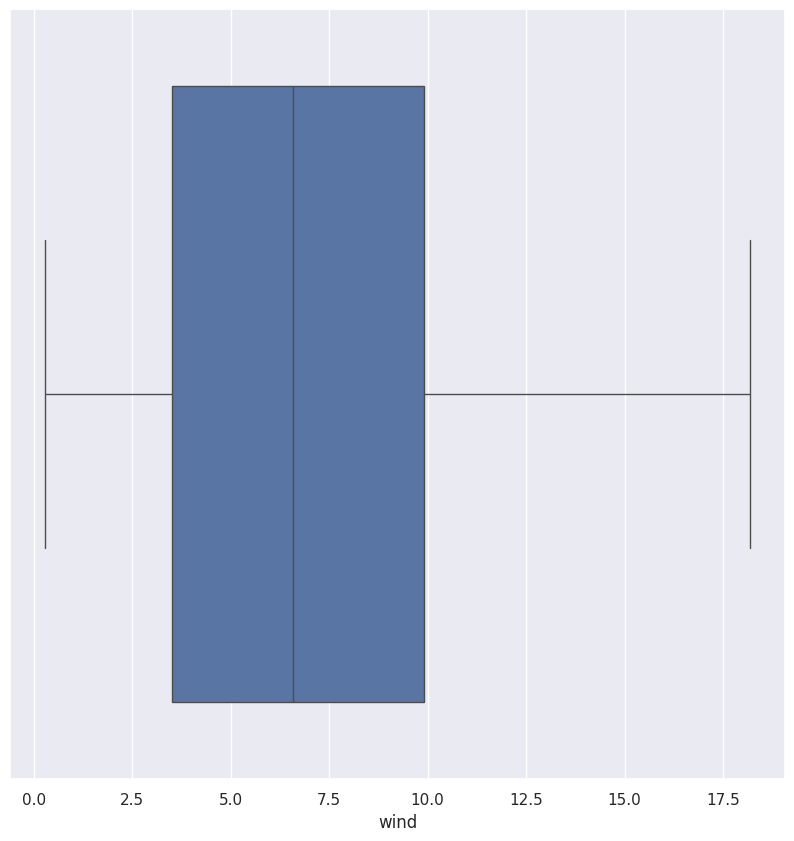

In [201]:
sns.boxplot(x=weather['wind'])
plt.show()

## there are clear outliers on temp column so let's remove it

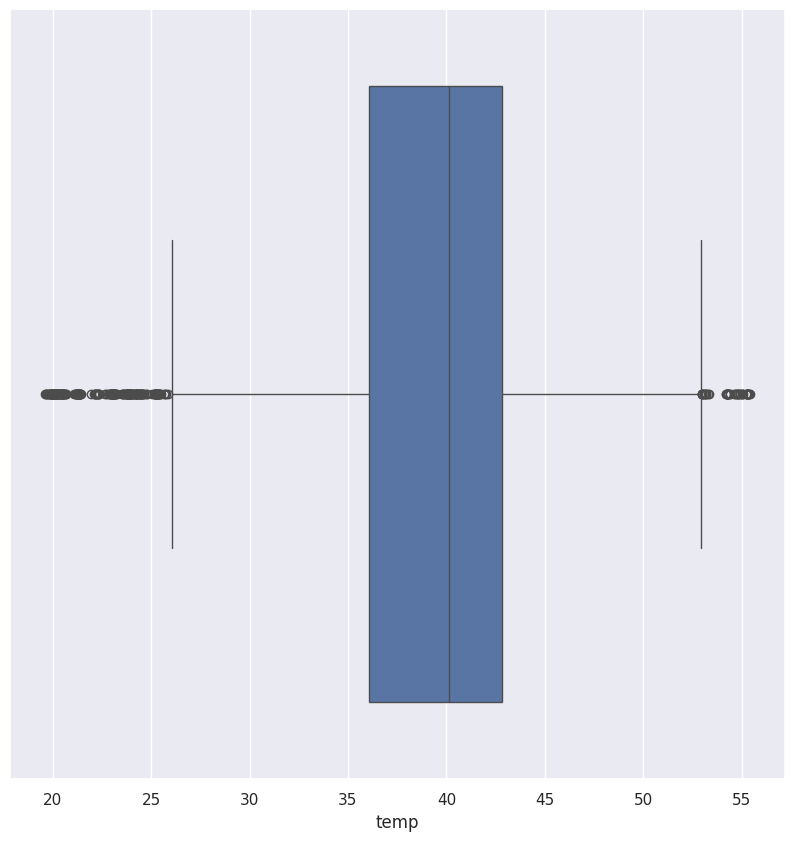

In [202]:
sns.boxplot(x=weather['temp'])
plt.show()

## - After I have removed these outliers using `IQR` method ,the boxplot still contains other outliers
- That's mean that we have a `non-normal` distribution data, so we will use `median absolute deviation` method that can treat with such problem

In [203]:
!pip install scipy==1.8.1

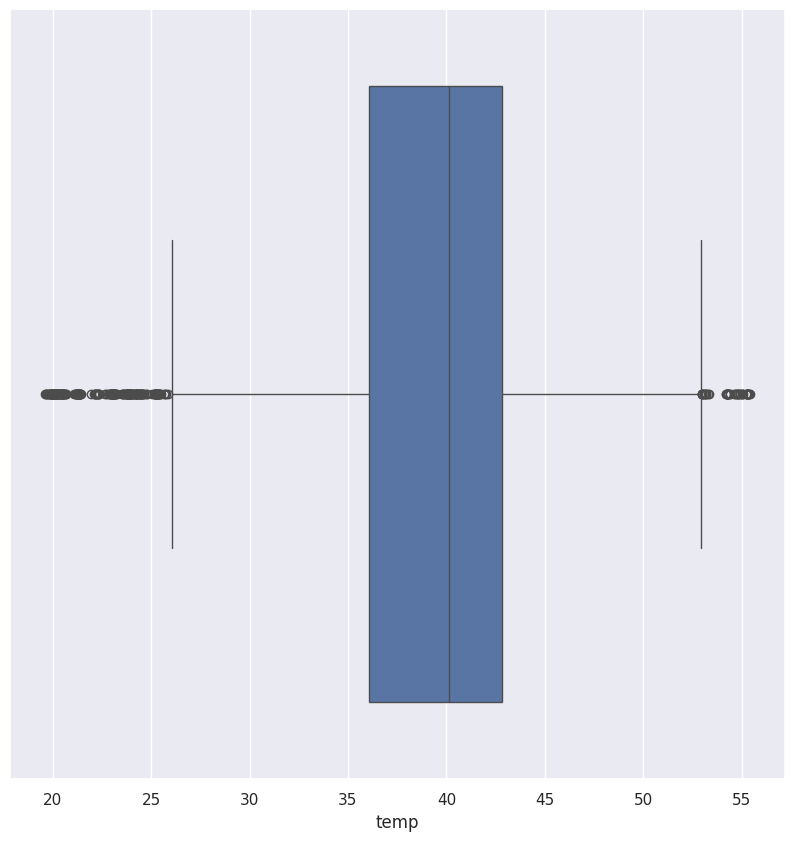

number of outliers in temp is : 401


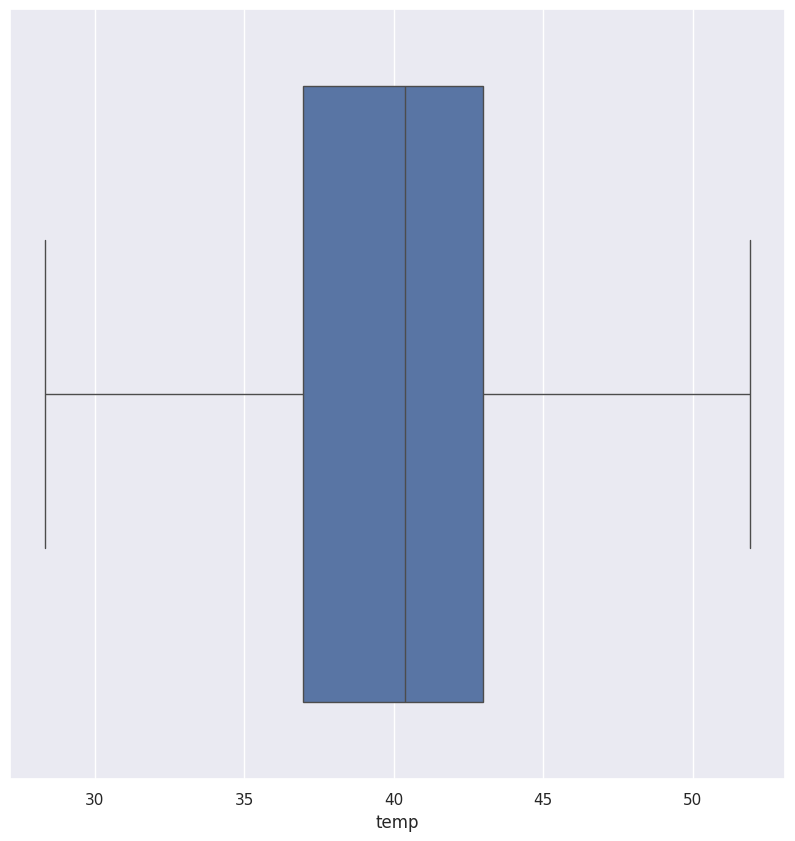

In [204]:
def MAD(df,col,thresh_hold):
    sns.boxplot(x=df[col])
    plt.show()
    from scipy import stats
    med = float(np.median(df[col], axis = 0))
    mad = (stats.median_absolute_deviation(df[col]))
    outlier = []
    for i, v in enumerate(df[col]):
        t = (v-med)/mad
        if t > thresh_hold or t<-thresh_hold:
            outlier.append(i)
        else:
            continue
    print('number of outliers in {} is : {}'.format( col,len(outlier)))

    d=df.drop(outlier)
    sns.boxplot(x=d[col])
    plt.show()
    return d

weath=MAD(weather,'temp',thresh_hold=2.3)

In [205]:
weath.head()

,temp,location,clouds,pressure,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,1545003901,0.75,11.49


In [206]:
weath.shape

(5875, 7)

In [207]:
taxi['destination'].unique().sort()==weath['location'].unique().sort()

True

In [208]:
weath['location'].value_counts()

,count
location,
Haymarket Square,492
Back Bay,491
North End,491
Beacon Hill,490
Boston University,490
North Station,490
Fenway,489
Northeastern University,489
West End,489


weath=pd.get_dummies(data=weath,columns=['location'])

# Let's merge our data

In [209]:
print('weather shape:{}'.format(weath.shape))
print('Taxi shape:{}'.format(taxi.shape))

weather shape:(5875, 7)
Taxi shape:(608504, 9)


In [210]:
data=taxi.copy()
data2=weath.copy()

In [211]:
from datetime import datetime
data['time_stamp'] = data['time_stamp'].astype(str)
data2['time_stamp'] = data2['time_stamp'].astype(str)
data['time_stamp'] = data['time_stamp'].str[:7]
data2['time_stamp'] = data2['time_stamp'].str[:7]
data.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name
0,0.44,Lyft,1544950,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared
1,0.44,Lyft,1543280,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux
2,0.44,Lyft,1543370,North Station,Haymarket Square,7.0,1.0,lyft,Lyft
3,0.44,Lyft,1543550,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543460,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL


In [212]:
data2.rename(columns={'location':'destination'},inplace=True)
data2.head(5)

,temp,destination,clouds,pressure,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,1545003,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,1545003,0.76,11.32
2,42.50,Boston University,1.0,1012.15,1545003,0.76,11.07
3,42.11,Fenway,1.0,1012.13,1545003,0.77,11.09
4,43.13,Financial District,1.0,1012.14,1545003,0.75,11.49


In [213]:
mergedf = data2.merge(data, how='inner')
mergedf.shape

(232468, 14)

In [214]:
mergedf.drop_duplicates(inplace=True)

In [215]:
mergedf.duplicated().sum() == 0
mergedf.shape

(180889, 14)

In [216]:
data=mergedf.copy()

In [217]:
data.head()

,temp,destination,clouds,pressure,time_stamp,humidity,wind,distance,cab_type,source,price,surge_multiplier,product_id,name
0,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,0.39,Uber,Financial District,7.0,1.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
1,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,0.48,Lyft,Financial District,11.0,1.0,lyft_premier,Lux
2,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,0.63,Lyft,Theatre District,5.0,1.0,lyft_line,Shared
3,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,0.39,Uber,Financial District,10.5,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
4,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,2.48,Uber,Beacon Hill,18.5,1.0,6c84fd89-3f11-4782-9b50-97c468b19529,Black


# Applying some Exploratory Data Analysis and Visualization

## Distances


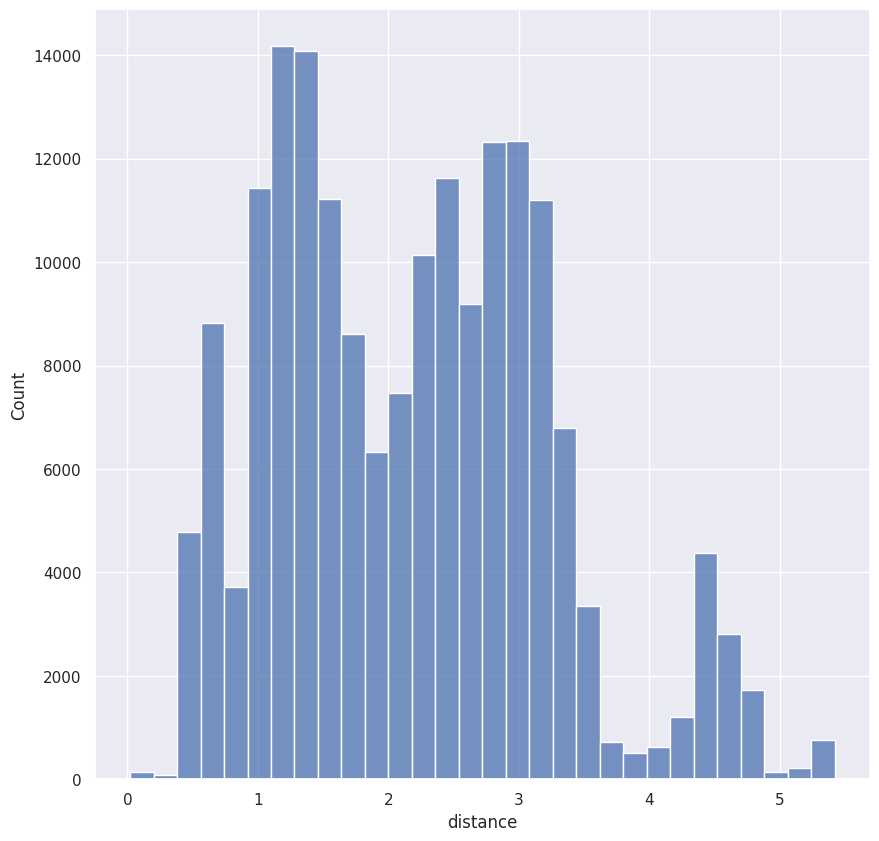

In [218]:
sns.histplot(data=data['distance'],kde=False,bins=30)
plt.show()

## number of cab_type with respect to sources and destinations of the travels

<Axes: xlabel='cab_type,source'>

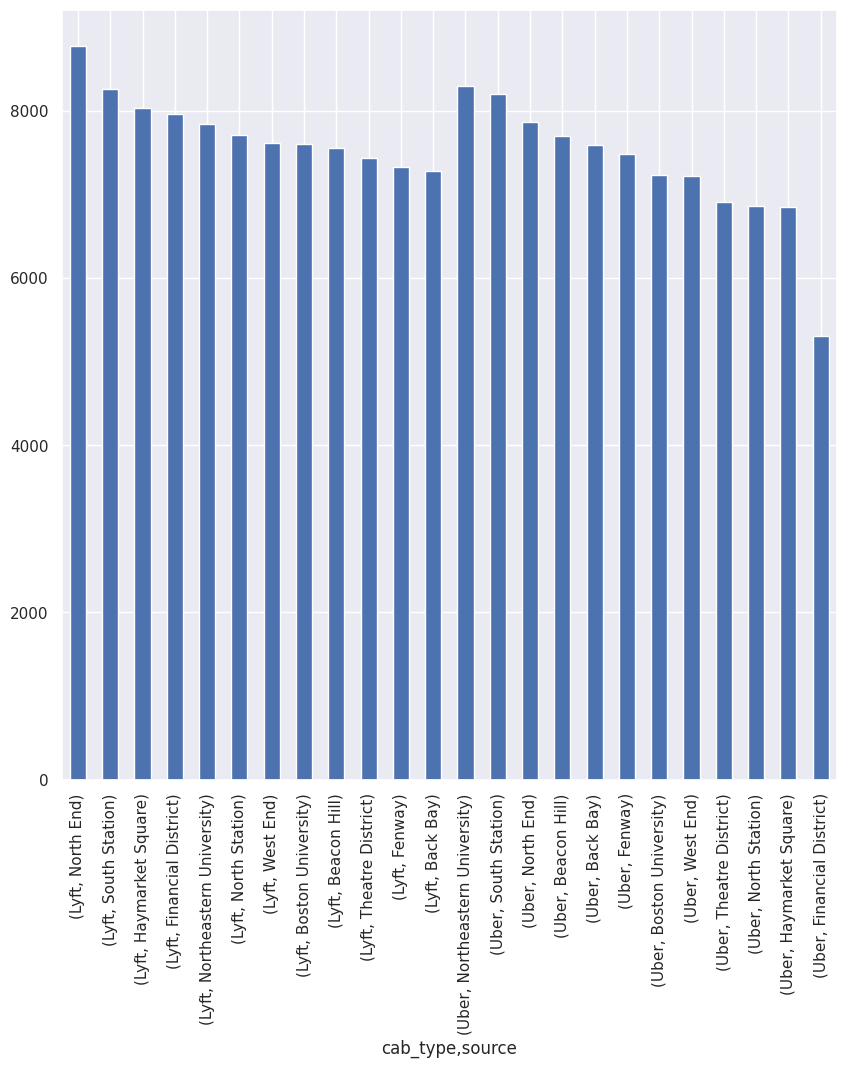

In [219]:
data.groupby(['cab_type'])['source'].value_counts().plot(kind='bar')

<Axes: xlabel='cab_type,destination'>

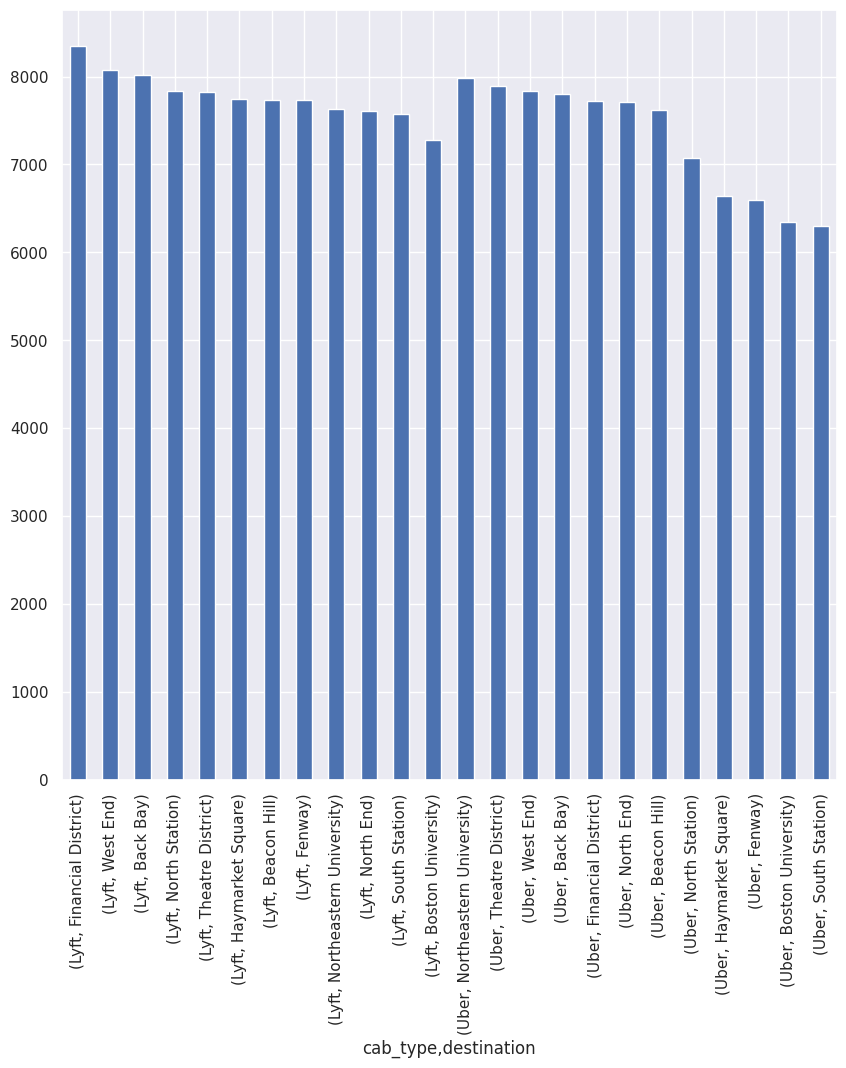

In [220]:
data.groupby(['cab_type'])['destination'].value_counts().plot(kind='bar')

## overall outcome for each cab_type

In [221]:
data.groupby('cab_type')['price'].sum()

,price
cab_type,
Lyft,1547064.98
Uber,1409727.00


### overall surge_multiplier for each cab_type


In [222]:
data.groupby('cab_type')['surge_multiplier'].sum()

,surge_multiplier
cab_type,
Lyft,93386.0
Uber,87503.0


## know overall distances to specific destinations


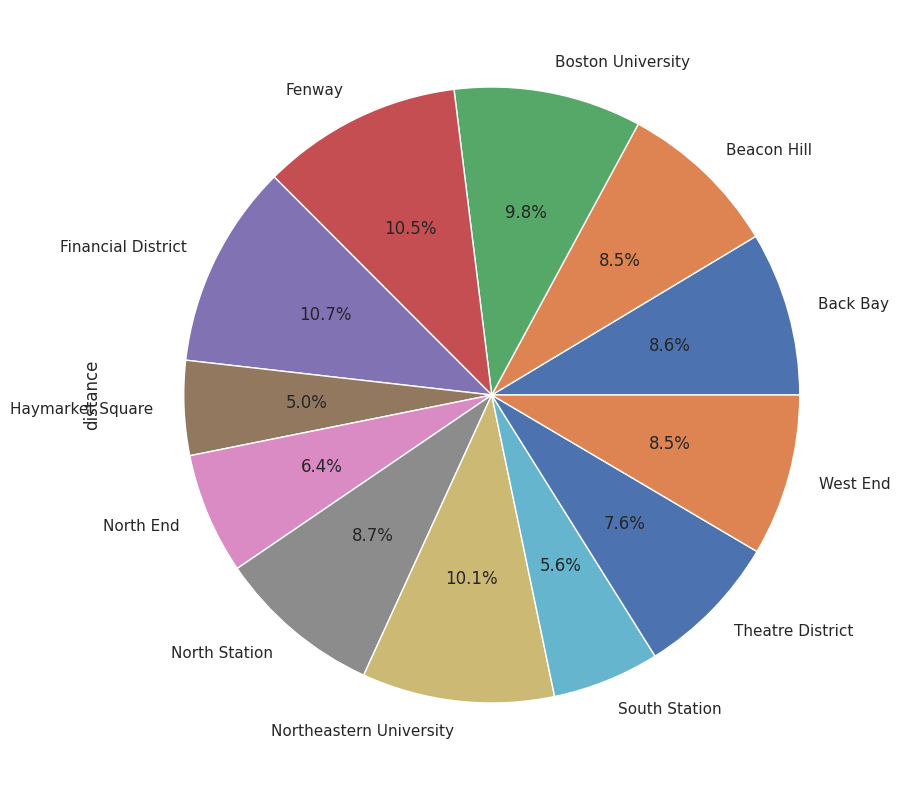

In [223]:
data.groupby('destination')['distance'].sum().plot.pie(autopct="%.1f%%");
plt.show()

# let's apply feature selection

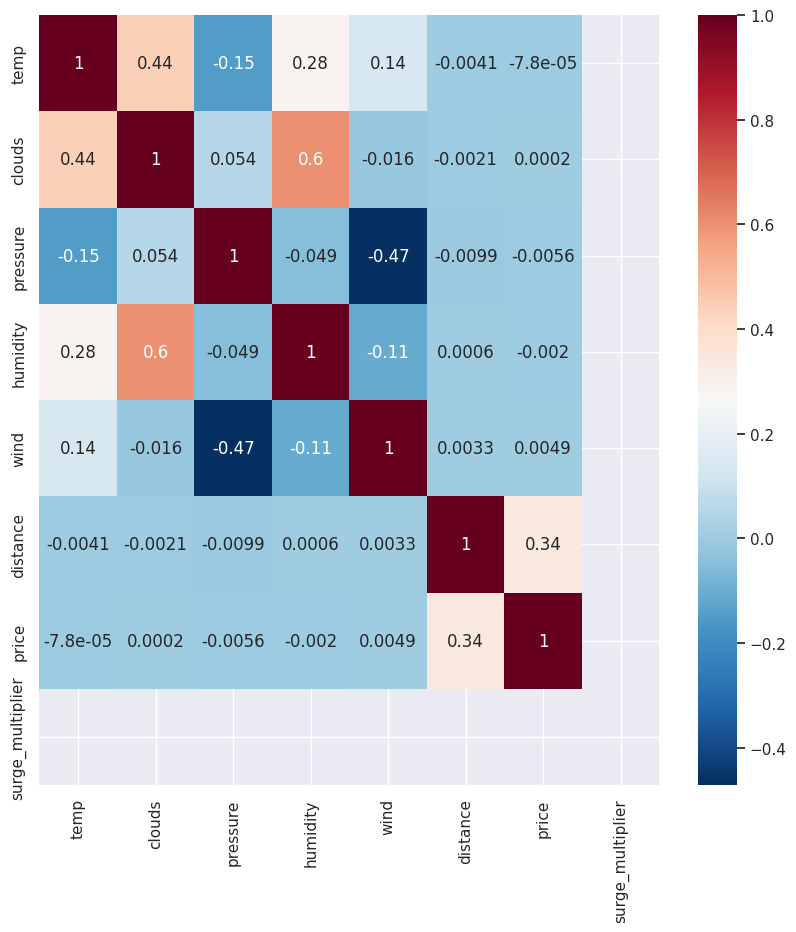

In [224]:
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r')
plt.show()

### we will drop  `surge_multiplier` since it has no correlation with any other feature


In [225]:
data.drop(['surge_multiplier'],axis=1,inplace=True)


- we will drop `temp` and keep `humidity` ,since one of them is redundunt due to high correlation between.
- and because `humidity` has higher coorrelation with the target

In [226]:
data.drop(['temp'],axis=1,inplace=True)#

ans so
- we will drop `wind` and keep `pressure` ,since one of them is redundunt due to high correlation between.
- and because `pressure` has higher coorrelation with the target


In [227]:
data.drop(['wind'],axis=1,inplace=True)#

ans so
- we will drop `pressure` and keep `humidity` ,since one of them is redundunt due to high correlation between.
- and because `humidity` has higher coorrelation with the target


data.drop(['humidity'],axis=1,inplace=True)

ans so
- we will drop `clouds` and keep `humidity` ,since one of them is redundunt due to high correlation between.
- and because `humidity` has higher coorrelation with the target


In [228]:
data.drop(['clouds'],axis=1,inplace=True) #


In [229]:
data.drop(['time_stamp'],axis=1,inplace=True)


In [230]:
data.drop(['pressure','humidity'],axis=1,inplace=True)


# After we have tried merging our taxi data with weather,we tried to apply feature selection to find which variables of weather

- data we are going to use ,finally we can conclude that we will no longer use weather data and we will use the whole records

- of the Taxi data

In [231]:
from datetime import datetime
data=taxi.copy()
data['time_stamp'] = data['time_stamp'].apply(lambda x: int(x / 1000))
data['time_stamp'] = data['time_stamp'].apply(lambda ts: datetime.utcfromtimestamp(int(ts)).strftime('%Y-%m-%d'))

In [232]:
data.dropna(inplace=True)

In [233]:
data=pd.get_dummies(data,columns=['name','cab_type'])

In [234]:
data.drop([ 'product_id','time_stamp','destination','source','surge_multiplier'],axis=1,inplace=True)
x=data.drop('price',axis=1)
y=data[['price']]

In [235]:
x

,distance,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber
0,0.44,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,0.44,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,0.44,False,False,False,False,False,True,False,False,False,False,False,False,True,False
3,0.44,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,0.44,False,False,False,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,False,False,False,False,False,False,False,False,False,False,False,True,False,True
693066,1.00,False,False,False,False,False,False,False,False,False,False,True,False,False,True
693067,1.00,False,False,False,False,False,False,False,False,False,True,False,False,False,True
693069,1.00,False,True,False,False,False,False,False,False,False,False,False,False,False,True


In [236]:
y

,price
0,5.0
1,11.0
2,7.0
3,26.0
4,9.0
...,...
693065,9.5
693066,13.0
693067,9.5
693069,27.0


In [237]:
from sklearn.model_selection import train_test_split

In [238]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [239]:
print('train:',X_train.shape)
print('test:',X_test.shape)
import time
import joblib

train: (486803, 15)
test: (121701, 15)


# Linear Regression Model

In [ ]:
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=46)

# Initialize the linear regression model
model = LinearRegression()

# Measure the time taken to train the model
start = datetime.now()
model.fit(X_train, y_train)
end = datetime.now()
print('elapsed time={}'.format(end - start))

# Save the model to linear.pkl
joblib.dump(model, 'model_linear.pkl')

# Predictions for both training and testing sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate and display metrics
print("Train error / Root Mean Squared Error: {}".format(mean_squared_error(y_train, y_pred_train, squared=False)))
print("Train error / R^2 Score: {}".format(r2_score(y_train, y_pred_train)))

print("Test error / Root Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred_test, squared=False)))
print("Test error / R^2 Score: {}".format(r2_score(y_test, y_pred_test)))

elapsed time=0:00:00.529846
Train error / Root Mean Squared Error: 2.1540045365314797
Train error / R^2 Score: 0.9375827811709337
Test error / Root Mean Squared Error: 2.154419426994822
Test error / R^2 Score: 0.937547336046661


In [1]:
# ( R^2 scores for training and testing datasets)
train_accuracy = r2_score(y_train, y_pred_train)
test_accuracy = r2_score(y_test, y_pred_test)

# Labels for the bar chart
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['orange', 'purple'])
plt.ylim(0, 1)  # R^2 score ranges from 0 to 1 for a well-fitting model
plt.xlabel('Dataset')
plt.ylabel('R^2 Score (Accuracy)')
plt.title('Model Accuracy on Training and Testing Datasets')
plt.show()

NameError: name 'r2_score' is not defined

In [ ]:
import pickle

# Input fields
distance = float(input("Enter distance: "))
name_Black = int(input("Enter name_Black (0 or 1): "))
name_BlackSUV = int(input("Enter name_Black SUV (0 or 1): "))
name_Lux = int(input("Enter name_Lux (0 or 1): "))
name_LuxBlack = int(input("Enter name_Lux Black (0 or 1): "))
name_LuxBlackXL = int(input("Enter name_Lux Black XL (0 or 1): "))
name_Lyft = int(input("Enter name_Lyft (0 or 1): "))
name_LyftXL = int(input("Enter name_Lyft XL (0 or 1): "))
name_Shared = int(input("Enter name_Shared (0 or 1): "))
name_UberPool = int(input("Enter name_UberPool (0 or 1): "))
name_UberX = int(input("Enter name_UberX (0 or 1): "))
name_UberXL = int(input("Enter name_UberXL (0 or 1): "))
name_WAV = int(input("Enter name_WAV (0 or 1): "))
cab_type_Lyft = int(input("Enter cab_type_Lyft (0 or 1): "))
cab_type_Uber = int(input("Enter cab_type_Uber (0 or 1): "))

# Create a dictionary with input values
input_data = {
    'distance': distance,
    'name_Black': name_Black,
    'name_Black SUV': name_BlackSUV,
    'name_Lux': name_Lux,
    'name_Lux Black': name_LuxBlack,
    'name_Lux Black XL': name_LuxBlackXL,
    'name_Lyft': name_Lyft,
    'name_Lyft XL': name_LyftXL,
    'name_Shared': name_Shared,
    'name_UberPool': name_UberPool,
    'name_UberX': name_UberX,
    'name_UberXL': name_UberXL,
    'name_WAV': name_WAV,
    'cab_type_Lyft': cab_type_Lyft,
    'cab_type_Uber': cab_type_Uber
}

# Load the model from the pickle file using joblib
import joblib  # Make sure joblib is imported
with open('model_linear.pkl', 'rb') as file:
    model = joblib.load(file)  # Use joblib.load instead of pickle.load

# Make prediction using the loaded model
prediction = model.predict([list(input_data.values())])
print("Predicted price:", prediction[0])  # You likely want prediction[0] instead of prediction[0][0]

Enter distance: 500
Enter name_Black (0 or 1): 0
Enter name_Black SUV (0 or 1): 0
Enter name_Lux (0 or 1): 0
Enter name_Lux Black (0 or 1): 0
Enter name_Lux Black XL (0 or 1): 0
Enter name_Lyft (0 or 1): 1
Enter name_Lyft XL (0 or 1): 1
Enter name_Shared (0 or 1): 0
Enter name_UberPool (0 or 1): 0
Enter name_UberX (0 or 1): 0
Enter name_UberXL (0 or 1): 0
Enter name_WAV (0 or 1): 0
Enter cab_type_Lyft (0 or 1): 1
Enter cab_type_Uber (0 or 1): 0
Predicted price: [1360.55319752]
